# DATA ANALYSIS PROJECT


For this capstone project we will be using the following libraries of python
* Numpy
* Pandas
* Matplotlib
* Seaborn

The steps followed are
* Importing the libraries and calling the dataset
* Cleaning up Dataset
* dropping null values and converting it to integer
* Plotting bar graphs,scatter plots and pie charts to compare different cases


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
df=pd.read_csv(r"C:\\Users\\jyova\\OneDrive\\Desktop\\jyooo\\cars_engage_2022.csv")
orgdf=df

In [3]:
df

,Unnamed: 0,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,...,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
0,0,Tata,Nano Genx,Xt,"Rs. 2,92,667",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Tata,Nano Genx,Xe,"Rs. 2,36,447",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Tata,Nano Genx,Emax Xm,"Rs. 2,96,661",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Tata,Nano Genx,Xta,"Rs. 3,34,768",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Tata,Nano Genx,Xm,"Rs. 2,72,223",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,1271,Honda,City,Vx Mt Diesel,"Rs. 13,02,000",1498 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,...,Yes,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1272,1272,Honda,City,Zx Mt Diesel,"Rs. 14,21,000",1498 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,...,Yes,Yes,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1273,1273,Honda,City,Zx Cvt Petrol,"Rs. 14,31,000",1497 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,...,Yes,Yes,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1274,1274,Honda,City,V Cvt Petrol,"Rs. 12,01,000",1497 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1276 entries, 0 to 1275
Columns: 141 entries, Unnamed: 0 to Electric_Range
dtypes: float64(6), int64(1), object(134)
memory usage: 1.4+ MB


In [5]:
df.describe()

,Unnamed: 0,Cylinders,Valves_Per_Cylinder,Doors,Seating_Capacity,Number_of_Airbags,USB_Ports
count,1276.000000,1210.000000,1174.000000,1272.000000,1270.000000,1141.000000,29.000000
mean,637.500000,4.380992,3.977853,4.550314,5.270079,3.787029,1.793103
std,368.493781,1.660957,0.833763,0.747816,1.145231,2.522399,0.773642
min,0.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000
25%,318.750000,4.000000,4.000000,4.000000,5.000000,2.000000,1.000000
50%,637.500000,4.000000,4.000000,5.000000,5.000000,2.000000,2.000000
75%,956.250000,4.000000,4.000000,5.000000,5.000000,6.000000,2.000000
max,1275.000000,16.000000,16.000000,5.000000,16.000000,14.000000,3.000000


In [6]:
orgdf.shape

(1276, 141)

# DATA CLEANSING 

In [7]:
df.isna().sum()

Unnamed: 0              0
Make                   75
Model                   0
Variant                 0
Ex-Showroom_Price       0
                     ... 
USB_Ports            1247
Heads-Up_Display     1225
Welcome_Lights       1207
Battery              1263
Electric_Range       1259
Length: 141, dtype: int64

In [8]:
#replacing null value in Make with first name of model from a column named splitted model name
df.insert(loc=1,
          column='splitted_model',
          value= df["Model"].apply(lambda x: x.split()[0]))
df["Make"].fillna(df["splitted_model"], inplace = True)

In [9]:
df =df.drop(['Unnamed: 0','Auto-Dimming_Rear-View_Mirror', 'Hill_Assist', 'Gear_Indicator', '3_Point_Seat-Belt_in_Middle_Rear_Seat', 'Ambient_Lightning', 'Cargo/Boot_Lights', 'Drive_Modes', 'Engine_Immobilizer', 'High_Speed_Alert_System', 'Lane_Watch_Camera/_Side_Mirror_Camera', 'Passenger_Side_Seat-Belt_Reminder', 'Seat_Back_Pockets', 'Voice_Recognition', 'Walk_Away_Auto_Car_Lock', 'ABS_(Anti-lock_Braking_System)', 'Headlight_Reminder', 'Adjustable_Headrests', 'Gross_Vehicle_Weight', 'Airbags', 'Door_Ajar_Warning', 'EBD_(Electronic_Brake-force_Distribution)', 'Fasten_Seat_Belt_Warning', 'Gear_Shift_Reminder', 'Compression_Ratio', 'Adjustable_Steering_Column', 'Other_Specs', 'Other_specs', 'Parking_Assistance', 'Key_Off_Reminder', 'USB_Compatibility', 'Android_Auto', 'Apple_CarPlay', 'Cigarette_Lighter', 'Infotainment_Screen', 'Multifunction_Steering_Wheel', 'Average_Speed', 'EBA_(Electronic_Brake_Assist)', 'Seat_Height_Adjustment', 'Navigation_System', 'Second_Row_AC_Vents', 'Tyre_Pressure_Monitoring_System', 'Rear_Center_Armrest', 'iPod_Compatibility', 'ESP_(Electronic_Stability_Program)', 'Cooled_Glove_Box', 'Recommended_Tyre_Pressure', 'Heated_Seats', 'Turbocharger', 'ISOFIX_(Child-Seat_Mount)', 'Rain_Sensing_Wipers', 'Paddle_Shifters', 'Leather_Wrapped_Steering', 'Automatic_Headlamps', 'Engine_Type', 'ASR_/_Traction_Control', 'Cruise_Control', 'USB_Ports', 'Heads-Up_Display', 'Welcome_Lights', 'Battery', 'Electric_Range', 'Handbrake', 'Instrument_Console', 'Low_Fuel_Warning', 'Minimum_Turning_Radius', 'Multifunction_Display', 'Sun_Visor', 'Third_Row_AC_Vents', 'Ventilation_System', 'Central_Locking', 'Child_Safety_Locks', 'Clock', 'Cup_Holders', 'Distance_to_Empty', 'Door_Pockets', 'Engine_Malfunction_Light', 'Extended_Warranty', 'FM_Radio', 'Fuel-lid_Opener', 'CD_/_MP3_/_DVD_Player', 'Bluetooth', 'Boot-lid_Opener', 'Aux-in_Compatibility', 'Average_Fuel_Consumption', 'Start_/_Stop_Button', '12v_Power_Outlet', 'Power_Steering', 'Power_Windows', 'Power_Seats', 'Keyless_Entry'], axis=1)

In [10]:
df.isna().sum()

splitted_model                       0
Make                                 0
Model                                0
Variant                              0
Ex-Showroom_Price                    0
Displacement                        12
Cylinders                           66
Valves_Per_Cylinder                102
Drivetrain                           7
Cylinder_Configuration              13
Emission_Norm                       11
Engine_Location                     43
Fuel_System                          8
Fuel_Tank_Capacity                  69
Fuel_Type                            0
Height                               1
Length                               0
Width                               12
Body_Type                            6
Doors                                4
City_Mileage                       555
Highway_Mileage                    800
ARAI_Certified_Mileage             114
ARAI_Certified_Mileage_for_CNG    1249
Kerb_Weight                        365
Gears                    

In [11]:
df = df.dropna(subset=['Width', 'Height', 'Wheelbase', 'Fuel_Tank_Capacity', 'Seating_Capacity', 'Torque', 'Drivetrain', 'Doors', 'Seating_Capacity', 'Number_of_Airbags','Cylinders', 'Displacement'])

In [12]:
#cleaning data to extract useful information
df['Ex-Showroom_Price'] = df["Ex-Showroom_Price"].apply(lambda x:int( x[4:].replace(',','')))
df["Height"] = df["Height"].astype(str).apply(lambda x: x.replace(' mm','')).astype(float)
df["Length"] = df["Length"].astype(str).apply(lambda x: x.replace(' mm','')).astype(float)
df["Width"] = df["Width"].astype(str).apply(lambda x: x.replace(' mm','')).astype(float)
df["Wheelbase"] = df["Wheelbase"].astype(str).apply(lambda x: x.replace(' mm','')).astype(float)
df['Fuel_Tank_Capacity'] = df['Fuel_Tank_Capacity'].astype(str).apply(lambda x: x.replace(' litres','')).astype(float)
df["Displacement"] = df["Displacement"].astype(str).apply(lambda x: x.replace(' cc','')).astype(float)

df['Number_of_Airbags'] = df['Number_of_Airbags'].fillna(0)

In [13]:
df.shape

(1007, 51)

In [14]:
len(df)/len(orgdf)*100

78.91849529780565

*which shows that $78.91849 $ percentage of data is obtained for analysis after cleansing*

In [15]:
df.loc[df.ARAI_Certified_Mileage == '9.8-10.0 km/litre','ARAI_Certified_Mileage'] = '10'
df.loc[df.ARAI_Certified_Mileage == '10kmpl km/litre','ARAI_Certified_Mileage'] = '10'
df.loc[df.ARAI_Certified_Mileage == '22.4-21.9 km/litre', 'ARAI_Certified_Mileage'] = '22'
df['ARAI_Certified_Mileage'] = df['ARAI_Certified_Mileage'].dropna().astype(str).apply(lambda x: x.replace(' km/litre','')) .astype(float) 


HP = df.Power.str.extract(r'(\d{1,4}).*').astype(int) * 0.98632
HP = HP.apply(lambda x: round(x,2))
TQ = df.Torque.dropna().str.extract(r'(\d{1,4}).*').astype(int)
TQ = TQ.apply(lambda x: round(x,2))
df.Torque = TQ
df.Power = HP


In [16]:
#printing company vs car count list
for company in df['Make'].unique():
    print(company + " = " + str(len(df[df['Make']==company])))

Renault = 32
Maruti Suzuki = 133
Datsun = 9
Hyundai = 106
Tata = 70
Toyota = 82
Nissan = 29
Volkswagen = 28
Ford = 43
Mahindra = 70
Fiat = 9
Honda = 59
Jeep = 28
Isuzu = 2
Skoda = 43
Audi = 28
Mercedes-Benz = 54
Volvo = 15
Mini = 5
Jaguar = 21
Bmw = 33
Land Rover = 10
Porsche = 12
Lexus = 7
Maserati = 6
Lamborghini = 12
Bentley = 6
Ferrari = 8
Aston Martin = 3
Rolls-Royce = 7
Land Rover Rover = 14
Go+ = 9
Kia = 5
Mitsubishi = 7
Maruti Suzuki R = 2


In [17]:
dic = {}
for make in df['Make'].unique():
    dic[make] = sum(df['Make']==make)

car_statistics = sorted(dic.items(), key=lambda x: x[1], reverse=True)[:15]
car_statistics

[('Maruti Suzuki', 133),
 ('Hyundai', 106),
 ('Toyota', 82),
 ('Tata', 70),
 ('Mahindra', 70),
 ('Honda', 59),
 ('Mercedes-Benz', 54),
 ('Ford', 43),
 ('Skoda', 43),
 ('Bmw', 33),
 ('Renault', 32),
 ('Nissan', 29),
 ('Volkswagen', 28),
 ('Jeep', 28),
 ('Audi', 28)]

## Maruti Suzuki,Hyundai,Toyota,Tata and Mahindra are the top 5 companies with more car varaints

## BAR GRAPH ANALYSIS 

**ENGINE SIZE VS NUMBER OF CARS**

Text(0, 0.5, 'Count')

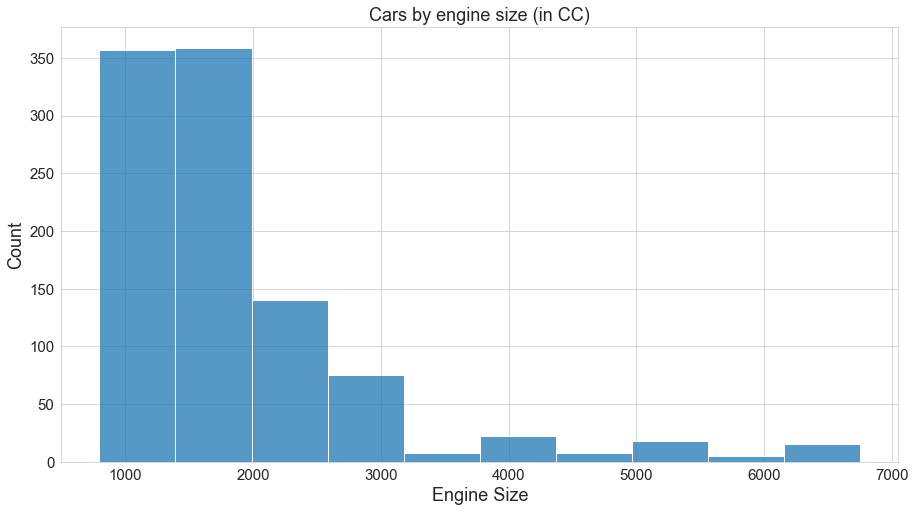

In [18]:
plt.figure(figsize=(15,8))
sns.histplot(data=df, x='Displacement',bins=10)
plt.title('Cars by engine size (in CC)',fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Engine Size",fontsize=18)
plt.ylabel("Count",fontsize=18)

### From the above graph, we conclude that most of the engine size is between the range of 624cc to 2000cc

**CARS VS BODY TYPE # 
MOST POPULAR CAR**

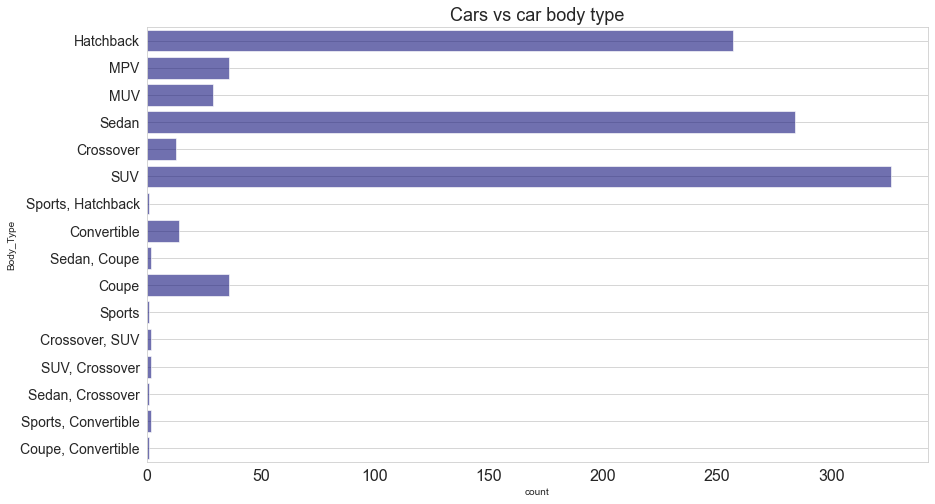

In [19]:
plt.figure(figsize=(14,8))
sns.countplot(data=df, y='Body_Type',alpha=.6,color='darkblue')
plt.title('Cars vs car body type',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=14)
plt.grid()
plt.show()

## SUVs are the most popular type of Cars, followed by Hatchbacks and Sedan

**PRICE VS NUMBER OF CARS**

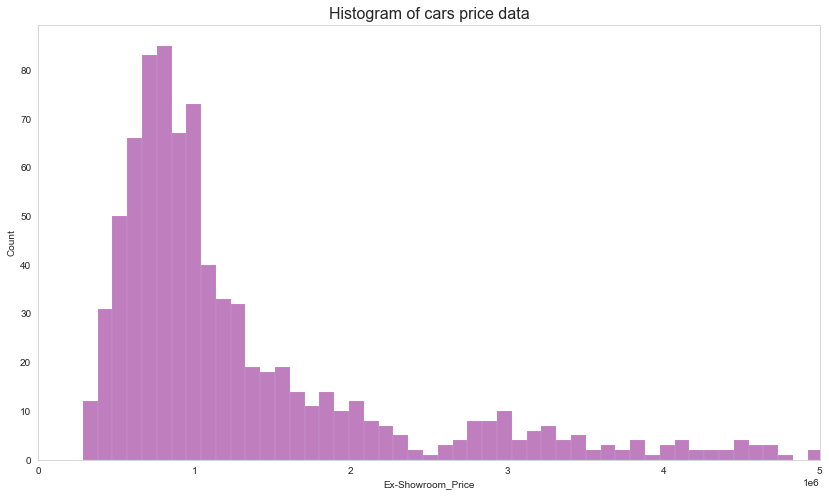

In [20]:
#price vs count
plt.figure(figsize=(14,8))
sns.histplot(data=df, x='Ex-Showroom_Price',bins=1000,alpha=.5, color='purple')
plt.title('Histogram of cars price data',fontsize=16)
plt.xlim(0, 5000000)
plt.grid()
plt.show()

### Large number of cars have the price range of 5-10lakh

**BODY_TYPE VS EX-SHOWROOM PRICE**

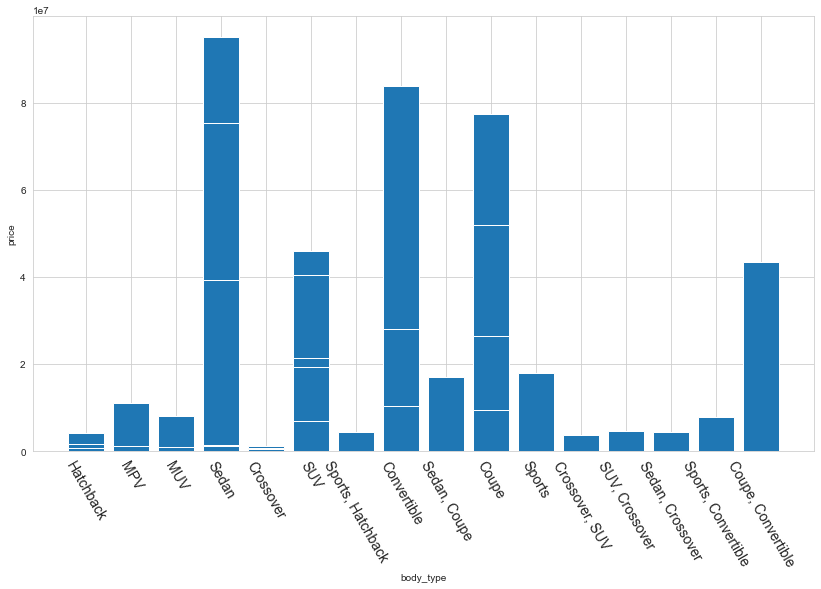

In [21]:
plt.figure(figsize=(14,8))
price = df['Ex-Showroom_Price']
body_type = df['Body_Type']
plt.ylabel('price')
plt.xlabel('body_type')
plt.xticks(fontsize=14, rotation=300)
plt.bar( body_type,price)
plt.show()

### The Sedan sells at the highest Ex-Showroomprice 

**FUEL TYPE VS NUMBER OF CARS**

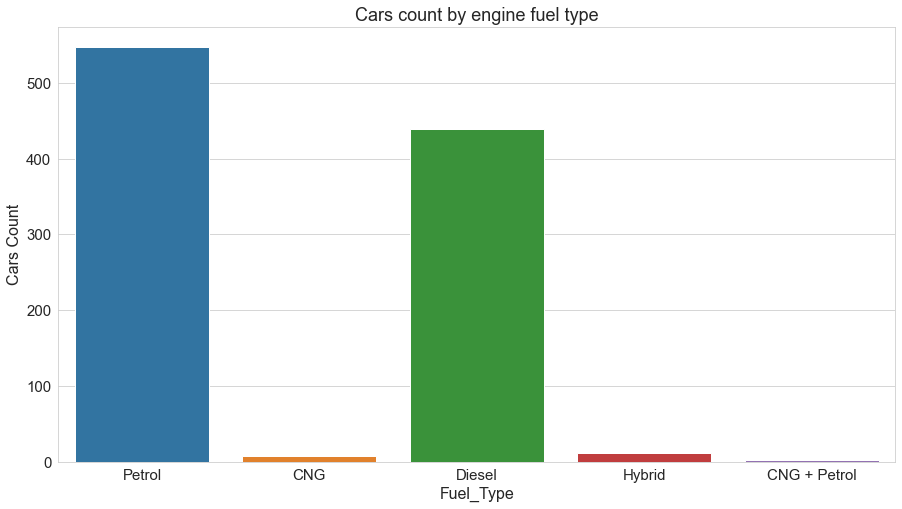

In [22]:
plt.figure(figsize=(15,8))
sns.countplot(data=df, x='Fuel_Type')
plt.title('Cars count by engine fuel type',fontsize=18)
plt.xlabel('Fuel_Type', fontsize=16)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Cars Count', fontsize=16);

**Petrol and Diesel fuel types are in dominant numbers**

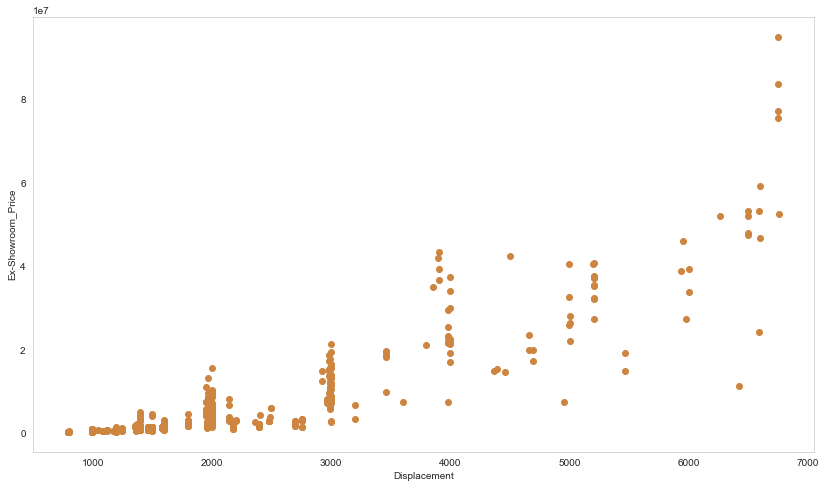

In [23]:
plt.figure(figsize=(14,8))
displacement = df['Displacement']
price = df['Ex-Showroom_Price']
plt.scatter(displacement, price, color='peru')
plt.ylabel('Ex-Showroom_Price')
plt.xlabel('Displacement')
plt.grid()
plt.show()

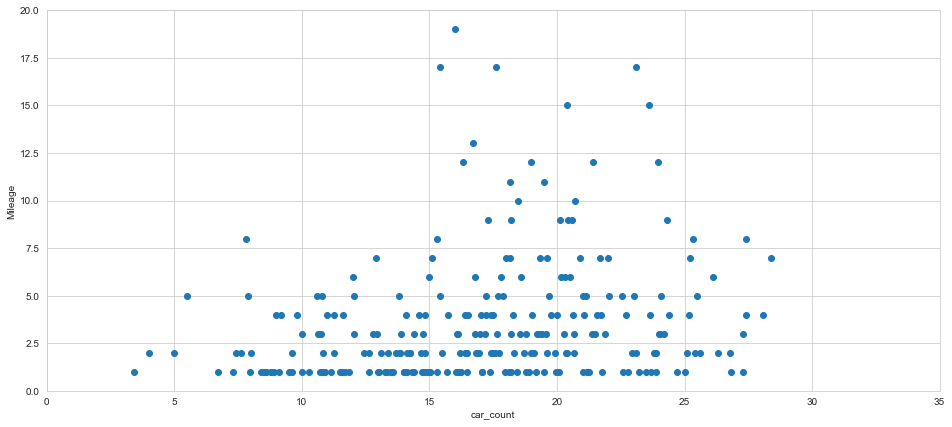

In [24]:
plt.figure(figsize=(16,7))
car_count = df['ARAI_Certified_Mileage'].value_counts()
plt.xlim(0 , 35)
plt.ylim(0 , 20)
plt.ylabel('Mileage')
plt.xlabel('car_count')
plt.plot(car_count,  linestyle='none', marker='o')
plt.show()

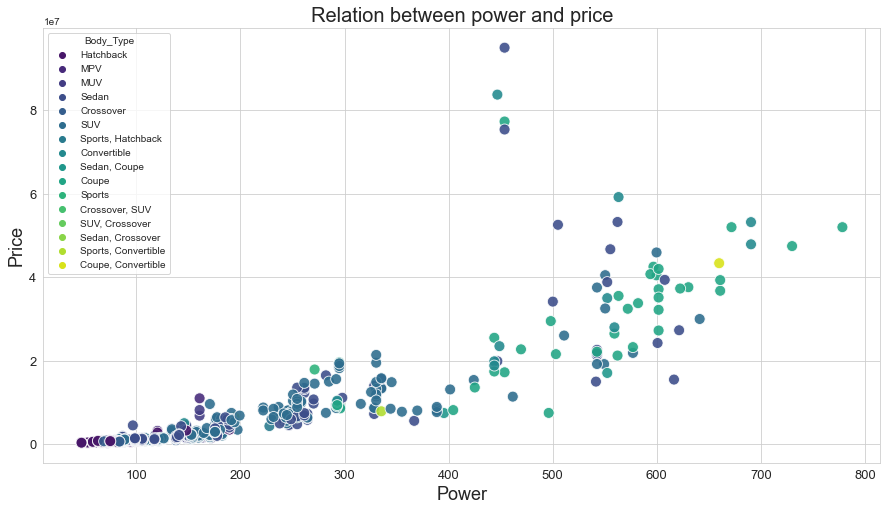

In [25]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df, x='Power', y='Ex-Showroom_Price',hue='Body_Type',palette='viridis',alpha=.89, s=120 );
plt.xticks(fontsize=13);
plt.yticks(fontsize=13)
plt.xlabel('Power',fontsize=18)
plt.ylabel('Price',fontsize=18)
plt.title('Relation between power and price',fontsize=20);

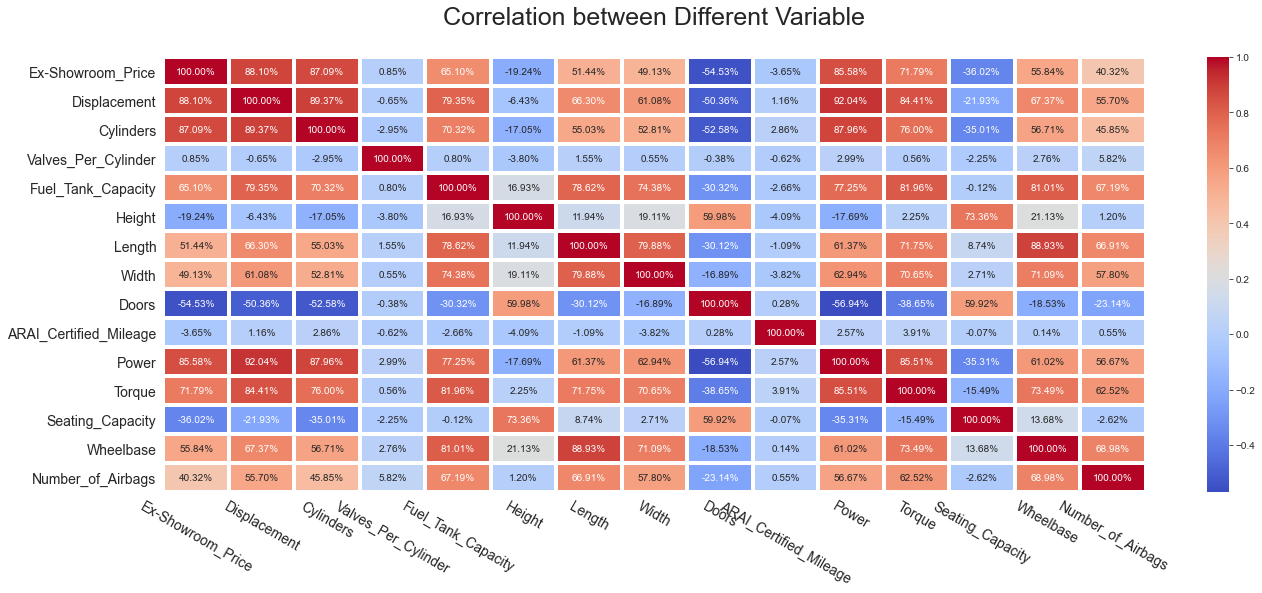

In [26]:
plt.figure(figsize=(22,8))
sns.heatmap(df.corr(), annot=True, fmt='.2%', cmap = 'coolwarm', linecolor = 'white', linewidth = 3)
plt.title('Correlation between Different Variable\n',fontsize = 25)
plt.xticks(fontsize=14, rotation=330)
plt.yticks(fontsize=14)
plt.savefig('Correlation.png')

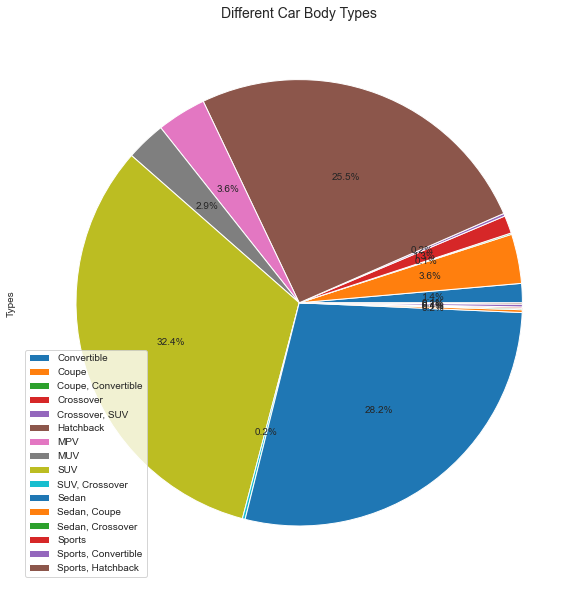

In [27]:
car = df["Body_Type"].value_counts().to_dict()
car_dataframe = pd.DataFrame(car.items(), columns=['Body Type', 'Types'])
car_dataframe.groupby(['Body Type']).sum().plot(kind='pie', y='Types' , legend=True , labels = None, autopct='%1.1f%%', figsize=(10, 20))
plt.title("Different Car Body Types", fontsize=14);

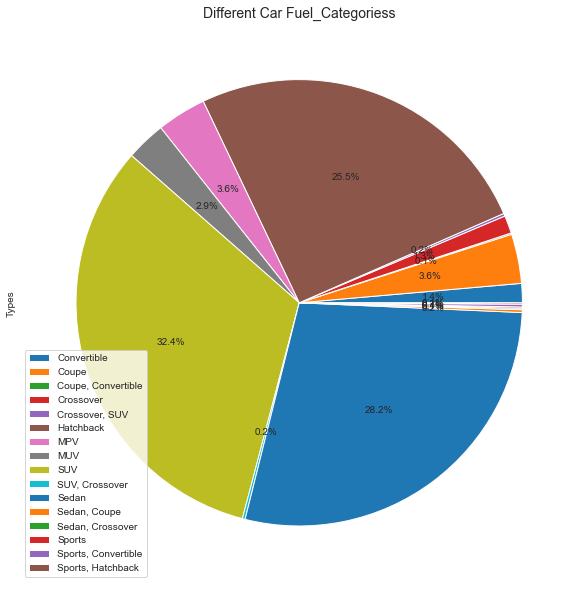

In [28]:
ar = df["Fuel_Type"].value_counts().to_dict()
car_dataframe = pd.DataFrame(car.items(), columns=['Fuel_Categories', 'Types'])
car_dataframe.groupby(['Fuel_Categories']).sum().plot(kind='pie', y='Types' , legend=True , labels = None, autopct='%1.1f%%', figsize=(10, 20))
plt.title("Different Car Fuel_Categoriess", fontsize=14);

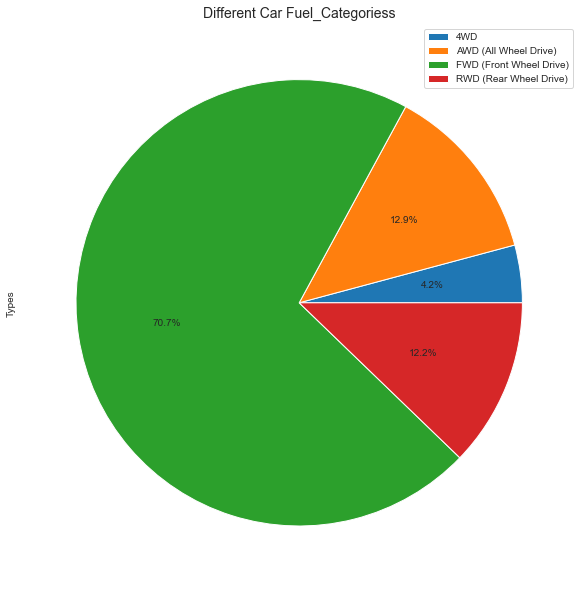

In [29]:
car = df["Drivetrain"].value_counts().to_dict()
car_dataframe = pd.DataFrame(car.items(), columns=['Fuel_Categories', 'Types'])
car_dataframe.groupby(['Fuel_Categories']).sum().plot(kind='pie', y='Types' , legend=True , labels = None, autopct='%1.1f%%', figsize=(10, 20))
plt.title("Different Car Fuel_Categoriess", fontsize=14);

# The following conclusions were obtained:

* Maruti Suzuki,Hyundai,Toyota,Tata and Mahindra are the top 5 companies with more car varaints.
* Most of the engine size is between the range of 624cc to 2000cc.
* SUVs are the most popular type of Cars, followed by Hatchbacks and Sedan.
* Large number of cars have the price range of 5-10 Lakh.
* The Sedan sells at the highest Ex-Showroomprice followed by Sedan,couple and Sports.
* Usage of Petrol and Diesel fuel types are in dominant numbers.
* As Displacement of car increases price also increases.

**Thank you :)**